# DTree $\rightarrow$ DNN

## 1、Classification

In [1]:
import numpy as np
from Util import gen_xor, gen_nine_grid, gen_two_clusters, gen_five_clusters, visualize2d

soft = False

class DTNN:
    def __init__(self, ws, b):
        self._ws, self._b = ws, b
    
    @staticmethod
    def _transform(x, soft):
        indices = np.argmax(x, axis=1)
        if not soft:
            rs = np.zeros_like(x)
            rs[range(len(x)), indices] = 1
            return rs
        x -= x[range(len(x)), indices][..., None]
        exp_x = np.exp(x)
        return exp_x / np.max(exp_x, axis=1, keepdims=True)
    
    @staticmethod
    def _clip(x, soft):
        if soft:
            return np.tanh(x)
        mask = x >= 0
        x[mask], x[~mask] = 1, -1
        return x
    
    def predict(self, x, soft=soft, raw=False):
        rs = self._clip(x.dot(self._ws[0]) + self._b, soft)
        rs = self._transform(rs.dot(self._ws[1]), soft)
        rs = rs.dot(self._ws[2])
        if raw:
            return rs
        return np.argmax(rs, axis=1)

### 异或

$$
x>0\wedge y>0\rightarrow1
$$
$$
x>0\wedge y<0\rightarrow0
$$
$$
x<0\wedge y>0\rightarrow0
$$
$$
x<0\wedge y<0\rightarrow1
$$

准确率：   100.0 %


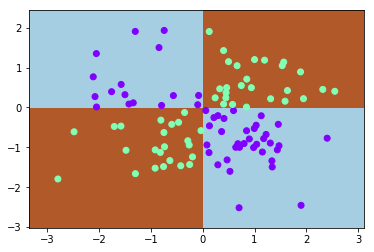

In [2]:
x, y = gen_xor()
nn = DTNN(
    [
        np.eye(2),
        np.array([
            [1, 1, -1, -1],
            [1, -1, 1, -1]
        ]),
        np.array([
            [0, 1],
            [1, 0],
            [1, 0],
            [0, 1]
        ])
    ], 
    np.zeros(2)
)
print("准确率：{:8.6} %".format((nn.predict(x) == y).mean() * 100))

padding = 0.2
visualize2d(nn, x, y, padding, True)

### 九宫格

$$
\begin{matrix}
&&(x<-1\wedge y>1)& \\
&\vee&(x<-1\wedge y<-1)&\rightarrow0 \\
&&(x<-1\wedge y>-1\wedge y<1)& \\
&\vee&(x>-1\wedge x<1\wedge y>1)& \\
&\vee&(x>-1\wedge x<1\wedge y<-1)&\rightarrow1 \\
&&(x>-1\wedge x<1\wedge y>-1\wedge y<1)&\rightarrow2 \\
&&(x>1\wedge y>1)& \\
&\vee&(x>1\wedge y<-1)&\rightarrow0 \\
&&(x>1\wedge y>-1\wedge y<1)&\rightarrow1
\end{matrix}
$$

准确率     ：   100.0 %
Soft 准确率：    68.0 %


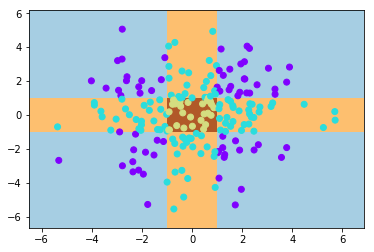

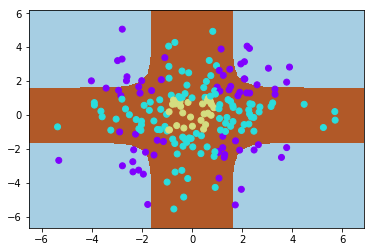

In [3]:
x, y = gen_nine_grid()
nn = DTNN(
    [
        np.array([
            [1, 1, 0, 0],
            [0, 0, 1, 1]
        ]),
        np.array([
            [-1/2, -1/2, -1/3, 1/3 , 1/3 , 1/4 , 0  , 0   , 0   ],
            [0   , 0   , 0   , -1/3, -1/3, -1/4, 1/2, 1/2 , 1/3 ],
            [0   , -1/2, 1/3 , 0   , -1/3, 1/4 , 0  , -1/2, 1/3 ],
            [1/2 , 0   , -1/3, 1/3 , 0   , -1/4, 1/2, 0   , -1/3]
        ]),
        np.array([
            [1, 0, 0], [1, 0, 0],
            [0, 1, 0], [0, 1, 0], [0, 1, 0],
            [0, 0, 1],
            [1, 0, 0], [1, 0, 0],
            [0, 1, 0]
        ])
    ],
    np.array([1, -1, 1, -1])
)
print("准确率     ：{:8.6} %".format((nn.predict(x) == y).mean() * 100))
print("Soft 准确率：{:8.6} %".format((nn.predict(x, True) == y).mean() * 100))

padding = 0.2
visualize2d(nn, x, y, padding, True)
visualize2d(nn, x, y, padding, True, True)

### Two Clusters

$$
x + y > 0 \rightarrow 0
$$
$$
x + y < 0 \rightarrow 1
$$

准确率：   100.0 %


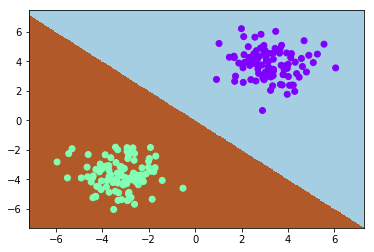

In [4]:
x, y = gen_two_clusters()
nn = DTNN(
    [
        np.array([
            [1],
            [1]
        ]),
        np.array([[1, -1]]),
        np.eye(2)
    ], 
    np.zeros(1)
)
print("准确率：{:8.6} %".format((nn.predict(x) == y).mean() * 100))

padding = 0.2
visualize2d(nn, x, y, padding, True)

### Five Clusters

$$
\begin{align}
x+y>1&\wedge x-y<-1&\rightarrow0 \\
x+y>1&\wedge x-y>1&\rightarrow1 \\
x+y<-1&\wedge x-y>1&\rightarrow2 \\
x+y<-1&\wedge x-y<-1&\rightarrow3 \\
x-y<1&\wedge x-y>-1&\rightarrow4 \\
x+y<1&\wedge x+y>-1&\rightarrow4
\end{align}
$$

准确率     ：   100.0 %
Soft 准确率：    87.5 %


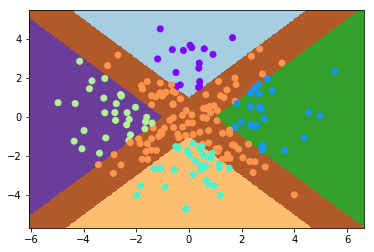

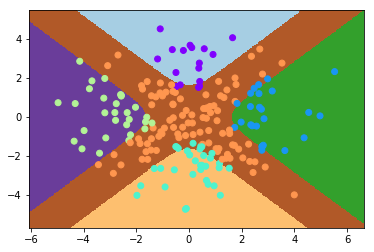

In [5]:
x, y = gen_five_clusters()
nn = DTNN(
    [
        np.array([
            [1, 1, 1, 1],
            [1, 1, -1, -1]
        ]),
        np.array([
            [1,  1,  0,  0,  0, -1],
            [0,  0, -1, -1,  0, 1 ],
            [0,  1,  1,  0, -1, 0 ],
            [-1, 0,  0, -1,  1, 0 ],
        ]),
        np.array([
            [1, 0, 0, 0, 0],
            [0, 1, 0, 0, 0],
            [0, 0, 1, 0, 0],
            [0, 0, 0, 1, 0],
            [0, 0, 0, 0, 1],
            [0, 0, 0, 0, 1]
        ])
    ], 
    np.array([-1, 1, -1, 1])
)
print("准确率     ：{:8.6} %".format((nn.predict(x) == y).mean() * 100))
print("Soft 准确率：{:8.6} %".format((nn.predict(x, True) == y).mean() * 100))

padding = 0.2
visualize2d(nn, x, y, padding, True)
visualize2d(nn, x, y, padding, True, True)

## 2、Regression

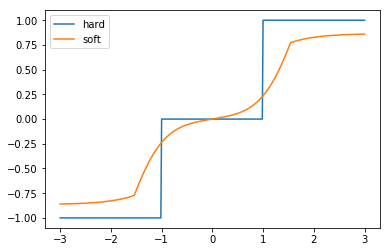

In [6]:
nn = DTNN(
    [
        np.array([
            [1, 1]
        ]),
        np.array([
            [1, -1, 0],
            [0, 1, -1],
        ]),
        np.array([
            [1],
            [0],
            [-1]
        ])
    ], 
    np.array([-1, 1])
)

import matplotlib.pyplot as plt

x = np.linspace(-3, 3, 400)[..., None]
y_hard = nn.predict(x, soft=False, raw=True)
y_soft = nn.predict(x, soft=True, raw=True)
plt.figure()
plt.plot(x, y_hard, label="hard")
plt.plot(x, y_soft, label="soft")
plt.legend()
plt.show()